In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/train_set_label.csv")
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/test_set_label.csv')

In [ ]:
train_data.shape,test_data.shape

((37500, 23), (12500, 22))

In [ ]:
indexes=train_data[train_data['price_of_car']==0].index
for i in indexes:
  train_data.drop(i,axis=0,inplace=True)

In [ ]:
outlierext=train_data[train_data['price_of_car']>4.100000e+05].index
for i in outlierext:
  train_data.drop(i,axis=0,inplace=True)

In [ ]:
train_data.shape

(34253, 23)

In [ ]:
combine=train_data.append(test_data)
combine.reset_index(inplace=True)
combine.drop('index',axis=1,inplace=True)
combine.shape

(46753, 23)

In [ ]:
for i in range(len(combine['car_description'])):
  try:
    if int(combine['car_description'][i][:5])>1900 and int(combine['car_description'][i][:5])<2020:
      combine['year'][i]=int(combine['car_description'][i][:5])
  except:
    continue

In [ ]:
dict={}
k=combine.groupby(['region']).agg({'year':'mean'}).reset_index()
for i in range(len(k)):
  try:
    dict[k['region'][i]]=int(k['year'][i])
  except:
    dict[k['region'][i]]=2009
yearnullindex=combine[combine['year'].isnull()==True].index
for i in yearnullindex:
  combine['year'][i]=dict[combine['region'][i]]
combine['year']=combine['year'].astype(int)

In [ ]:
combine.drop(['region_url','vin','drive','size','image_url','county','latitude','longitude','car_type','car_color','car_condition','title_status'],axis=1,inplace=True)

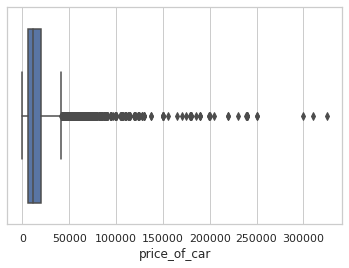

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax=sns.boxplot(train_data['price_of_car'])

In [ ]:
combine['manufacturer'].fillna('unknown',inplace=True)

In [ ]:
dict={}
k=combine.groupby(['manufacturer']).agg({'model_name':pd.Series.mode}).reset_index()
for i in range(len(k)):
    dict[k['manufacturer'][i]]=k['model_name'][i]
manufacturernullindex=combine[combine['model_name'].isnull()==True].index
for i in manufacturernullindex:
  combine['model_name'][i]=dict[combine['manufacturer'][i]]

In [ ]:
combine['#cylinders'].fillna('other',inplace=True)

In [ ]:
combine['fuel_type'].fillna('other',inplace=True)

In [ ]:
combine['transmission'].fillna('other',inplace=True)

In [ ]:
combine['car_description'].fillna('other',inplace=True)

In [ ]:
h=combine.groupby(['manufacturer','model_name','fuel_type']).agg({'odometer':'mean'}).reset_index()
h['odometer'].fillna(h['odometer'].mean(),inplace=True)

In [ ]:
odometerdict={}
for i,j,k,l in zip(h['manufacturer'],h['model_name'],h['fuel_type'],h['odometer']):
    odometerdict[i+j+k]=l
odometernullindex=combine[combine['odometer'].isnull()==True].index
for i in odometernullindex:
  combine['odometer'][i]=odometerdict[combine['manufacturer'][i]+combine['model_name'][i]+combine['fuel_type'][i]]

In [ ]:
combine.head()

,region,year,manufacturer,model_name,#cylinders,fuel_type,odometer,transmission,car_description,state,price_of_car
0,san antonio,2018,honda,accord ex-l,other,gas,130199.761905,automatic,"Price: $24,900 Miles: 31,269 Engine: 1.5L Turb...",tx,24900.0
1,hickory / lenoir,2011,unknown,Scion xB,other,other,97003.823980,other,other,nc,4500.0
2,fargo / moorhead,2010,unknown,Scion xB,other,other,97003.823980,other,other,mn,20000.0
3,asheville,2011,toyota,prius,4 cylinders,hybrid,291960.000000,automatic,This Toyota Prius can be yours today!If you ha...,nc,6500.0
4,los angeles,2009,unknown,Scion xB,other,other,97003.823980,other,other,ca,8995.0


In [ ]:
combine.drop(['car_description'],axis=1,inplace=True)

In [ ]:
combine.isnull().sum()

region              0
year                0
manufacturer        0
model_name          0
#cylinders          0
fuel_type           0
odometer            0
transmission        0
state               0
price_of_car    12500
dtype: int64

In [ ]:
np.unique(combine['year'])

array([1900, 1919, 1923, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
X = combine[combine['price_of_car'].isnull()!=True].drop(['price_of_car'], axis=1)
y = combine[combine['price_of_car'].isnull()!=True]['price_of_car']

test = combine[combine['price_of_car'].isnull()==True].drop(['price_of_car'], axis=1)

X.shape, y.shape, test.shape

((34253, 9), (34253,), (12500, 9))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 56kB/s 


In [ ]:
X.head()

,region,year,manufacturer,model_name,#cylinders,fuel_type,odometer,transmission,state
0,san antonio,2018,honda,accord ex-l,other,gas,130199.761905,automatic,tx
1,hickory / lenoir,2011,unknown,Scion xB,other,other,97003.823980,other,nc
2,fargo / moorhead,2010,unknown,Scion xB,other,other,97003.823980,other,mn
3,asheville,2011,toyota,prius,4 cylinders,hybrid,291960.000000,automatic,nc
4,los angeles,2009,unknown,Scion xB,other,other,97003.823980,other,ca


In [ ]:
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
m = CatBoostRegressor(n_estimators=5000,
                           random_state=1994,
                           eval_metric='RMSE',
                           learning_rate=0.03, 
                           max_depth=5,
                           cat_features=[0,2,3,4,5,7,8])
m.fit(X_train, y_train,
          eval_set=[(X_train,y_train),(X_test, y_test)],
          early_stopping_rounds=200,
          verbose=200)
np.sqrt(mean_squared_error(m.predict(X_test),y_test)) #12973

0:	learn: 15156.3127197	test: 15155.2245977	test1: 15882.3283458	best: 15882.3283458 (0)	total: 105ms	remaining: 8m 45s
200:	learn: 12574.8654785	test: 12387.6417465	test1: 13660.1202808	best: 13659.8627171 (199)	total: 8.66s	remaining: 3m 26s
400:	learn: 12341.1944929	test: 12175.7756634	test1: 13535.2016847	best: 13535.2016847 (400)	total: 16.9s	remaining: 3m 13s
600:	learn: 12173.2886660	test: 12030.9702798	test1: 13405.6073931	best: 13405.6073931 (600)	total: 25.2s	remaining: 3m 4s
800:	learn: 12083.9214907	test: 11944.4266147	test1: 13321.3484261	best: 13321.3177686 (799)	total: 33.3s	remaining: 2m 54s
1000:	learn: 11991.6920351	test: 11858.9179406	test1: 13268.1173695	best: 13268.1173695 (1000)	total: 41.3s	remaining: 2m 45s
1200:	learn: 11909.7037805	test: 11784.6732232	test1: 13215.2042297	best: 13215.2042297 (1200)	total: 49.7s	remaining: 2m 37s
1400:	learn: 11839.2360353	test: 11729.5916431	test1: 13179.2767558	best: 13179.2767558 (1400)	total: 57.9s	remaining: 2m 28s
1600:	l

12973.616607654565

In [ ]:
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import KFold

fold = KFold(n_splits=5)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostRegressor(n_estimators=5000,
                           random_state=1994,
                           eval_metric='RMSE',
                           learning_rate=0.04, 
                           max_depth=5,
                           cat_features=[0,2,3,4,5,7,8])
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict(x_val)
    print("err_cb: ",np.sqrt(mean_squared_error(pred_y,y_val)))
    errCB.append(np.sqrt(mean_squared_error(pred_y,y_val)))
    pred_test = m.predict(test)
    i = i + 1
    y_pred_tot_cb.append(pred_test)

0:	learn: 15103.3145498	test: 15102.0314845	test1: 15958.7748597	best: 15958.7748597 (0)	total: 59.5ms	remaining: 4m 57s
200:	learn: 12435.3738320	test: 12255.2348104	test1: 13593.7766518	best: 13593.7766518 (200)	total: 8.62s	remaining: 3m 25s
400:	learn: 12146.6100113	test: 11988.7237642	test1: 13490.5606047	best: 13490.1632955 (396)	total: 22.7s	remaining: 4m 20s
600:	learn: 11952.4562213	test: 11819.9333003	test1: 13398.6116847	best: 13398.6116847 (600)	total: 31.2s	remaining: 3m 48s
800:	learn: 11825.9656024	test: 11710.7113299	test1: 13331.5422493	best: 13331.5422493 (800)	total: 39.8s	remaining: 3m 28s
1000:	learn: 11736.8889225	test: 11642.9789291	test1: 13292.7201587	best: 13292.6488761 (999)	total: 48.1s	remaining: 3m 12s
1200:	learn: 11657.5268353	test: 11589.0785399	test1: 13259.8205344	best: 13259.8205344 (1200)	total: 56.4s	remaining: 2m 58s
1400:	learn: 11589.6872347	test: 11544.8260723	test1: 13233.9724147	best: 13233.7891911 (1394)	total: 1m 4s	remaining: 2m 46s
1600:	

In [ ]:
np.mean(errCB,0) #12148

12148.520716098781

In [ ]:
submission=pd.DataFrame()
submission['prediction']=np.mean(y_pred_tot_cb,0)
submission.to_csv('final.csv',index=False) #20809